In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

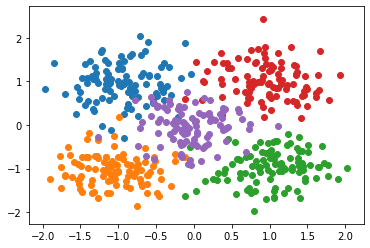

In [16]:
n_pts=500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [17]:
y_cat = to_categorical(y, 5)
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 132us/step - loss: 1.2016 - accuracy: 0.5420
Epoch 2/100
500/500 [==============================] - 0s 28us/step - loss: 0.5900 - accuracy: 0.8480
Epoch 3/100
500/500 [==============================] - 0s 40us/step - loss: 0.4027 - accuracy: 0.9220
Epoch 4/100
500/500 [==============================] - 0s 38us/step - loss: 0.3240 - accuracy: 0.9440
Epoch 5/100
500/500 [==============================] - 0s 40us/step - loss: 0.2842 - accuracy: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 30us/step - loss: 0.2594 - accuracy: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 48us/step - loss: 0.2423 - accuracy: 0.9480
Epoch 8/100
500/500 [==============================] - 0s 48us/step - loss: 0.2298 - accuracy: 0.9480
Epoch 9/100
500/500 [==============================] - 0s 46us/step - loss: 0.2201 - accuracy: 0.9480
Epoch 10/100
500/500 [==============================] - 0s 38us/step - loss: 0.21

500/500 [==============================] - 0s 32us/step - loss: 0.1518 - accuracy: 0.9520
Epoch 81/100
500/500 [==============================] - 0s 36us/step - loss: 0.1516 - accuracy: 0.9500
Epoch 82/100
500/500 [==============================] - 0s 48us/step - loss: 0.1540 - accuracy: 0.9500
Epoch 83/100
500/500 [==============================] - 0s 28us/step - loss: 0.1518 - accuracy: 0.9480
Epoch 84/100
500/500 [==============================] - 0s 28us/step - loss: 0.1509 - accuracy: 0.9500
Epoch 85/100
500/500 [==============================] - 0s 28us/step - loss: 0.1527 - accuracy: 0.9460
Epoch 86/100
500/500 [==============================] - 0s 30us/step - loss: 0.1541 - accuracy: 0.9500
Epoch 87/100
500/500 [==============================] - 0s 32us/step - loss: 0.1521 - accuracy: 0.9460
Epoch 88/100
500/500 [==============================] - 0s 30us/step - loss: 0.1520 - accuracy: 0.9500
Epoch 89/100
500/500 [==============================] - 0s 32us/step - loss: 0.1524 - 

In [18]:
def plot_decision_boundary(X, y_cat, model):
    x_span=np.linspace(min(X[:,0])-0.25, max(X[:, 0])+0.25)
    y_span=np.linspace(min(X[:,1])-0.25, max(X[:, 1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

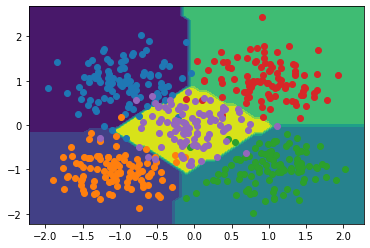

In [19]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is :  [3]


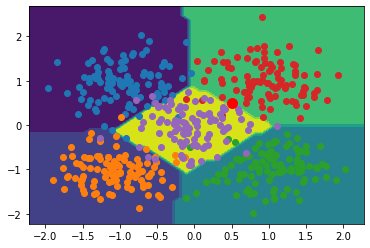

In [20]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x=0.5
y=0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is : ",prediction)